In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from unidecode import unidecode
import re


# datos

In [2]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [3]:
dfp=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfmerged')
dfp.head(1)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,Balcón,...,Parqueadero Visitantes,Colegios / Universidades,Parques cercanos,Zona Residencial,Closet,Nombre Municipio,Código Departamento,Código Municipio,Nombre Departamento,Tipo: Municipio / Isla / Área no municipalizada
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,NaN,NaN,NaN,NaN,NaN,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio


# Limpieza de los Nan 

In [4]:
def graf_num_nan(df):
        dfNan = df.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda df: (
                            df.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(df), # numero total de registros en el df original
                                    pct_missing = lambda df1 : df1.numero_Nan / df1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
        plt.figure(figsize=(20,7))
        dfgnan = dfNan.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
        plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
        plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
        plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
        # plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
        plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
        plt.xlabel("numero de Nan")
        plt.ylabel("Variable en orden ascendente en razon al numero de Nan")


        return dfNan

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2150,0.000000
1,url,0,2150,0.000000
2,titulo,0,2150,0.000000
3,precio,0,2150,0.000000
4,area,0,2150,0.000000
5,habitaciones,0,2150,0.000000
6,banos,0,2150,0.000000
7,garajes,0,2150,0.000000
8,descripcion,0,2150,0.000000
9,Balcón,1056,2150,49.116279


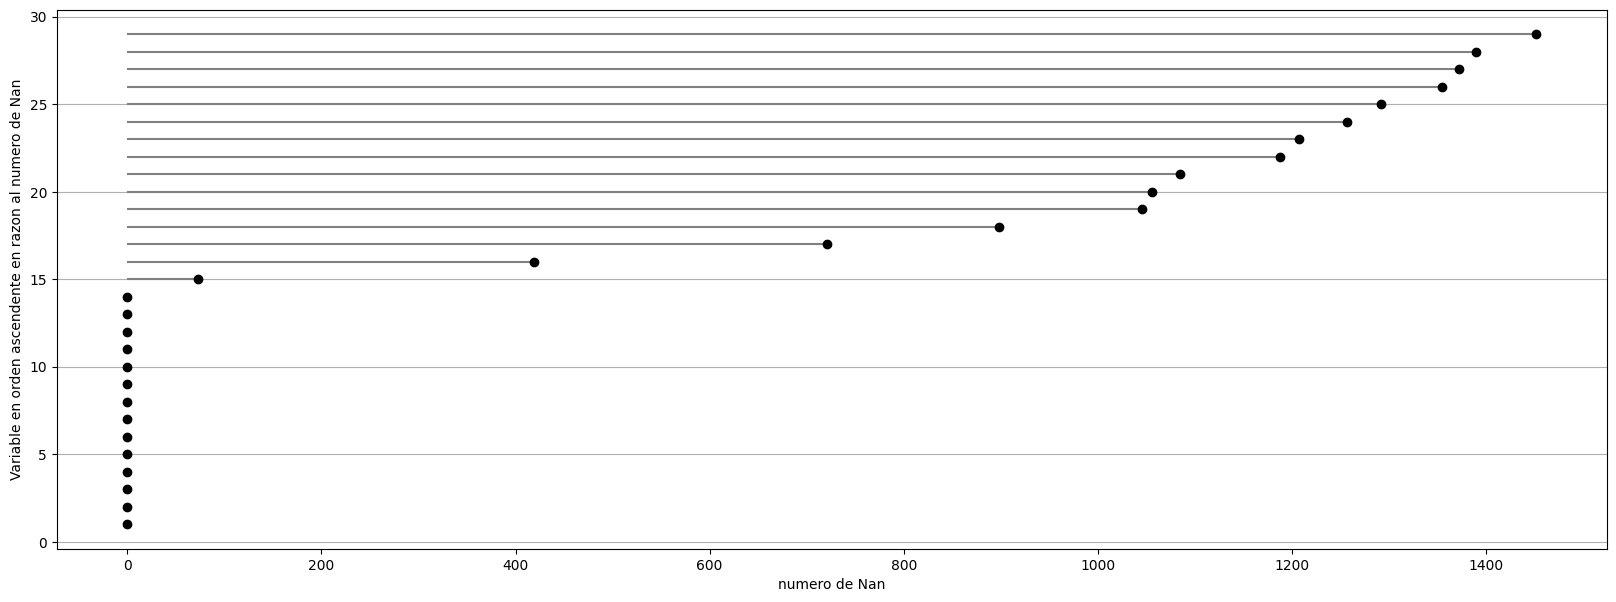

In [5]:
graf_num_nan(dfp)


Para todas las columnas excepto 
estrato y antiguedad se reemplazaran por 0

In [6]:
exclude_cols = ['antiguedad', 'estrato']

# reemplazar los valores NaN en las columnas no seleccionadas
cols_to_replace = dfp.columns[~dfp.columns.isin(exclude_cols)]
dfp[cols_to_replace] = dfp[cols_to_replace].fillna(0)

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2150,0.000000
1,url,0,2150,0.000000
2,titulo,0,2150,0.000000
3,precio,0,2150,0.000000
4,area,0,2150,0.000000
5,habitaciones,0,2150,0.000000
6,banos,0,2150,0.000000
7,garajes,0,2150,0.000000
8,descripcion,0,2150,0.000000
9,Balcón,0,2150,0.000000


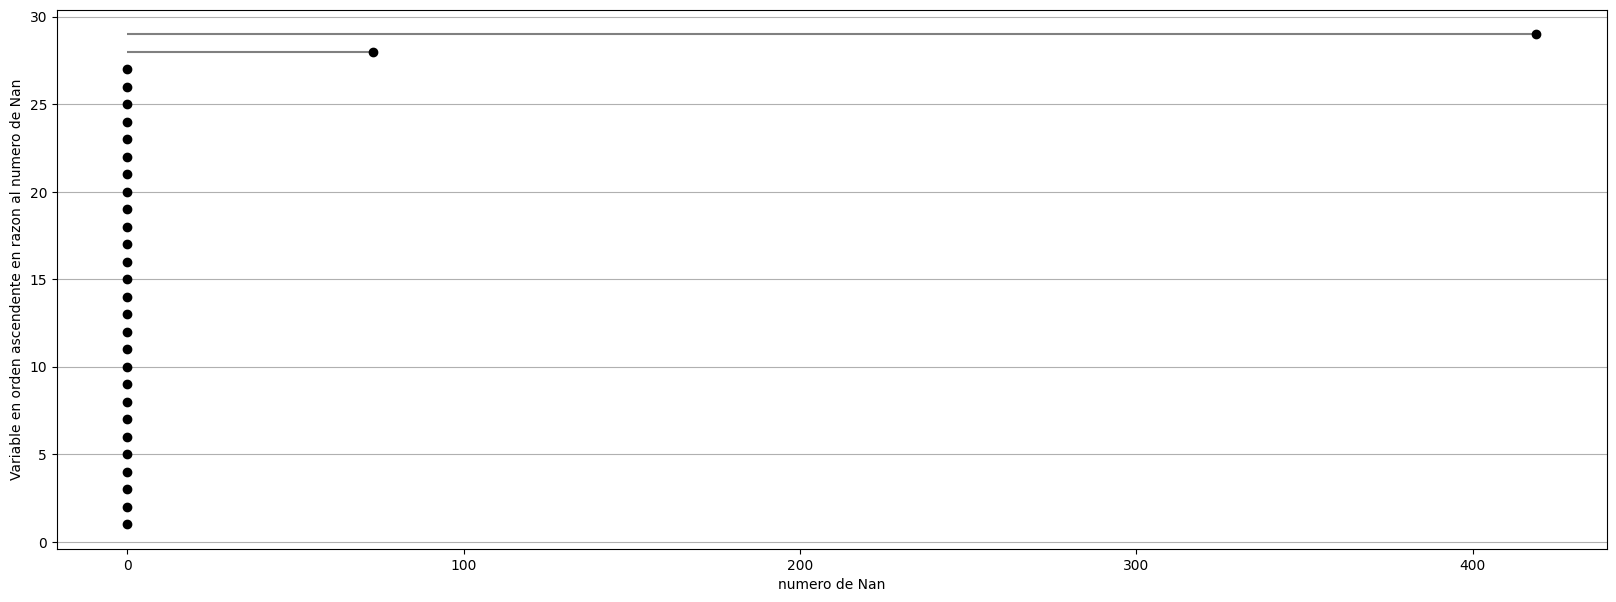

In [7]:
graf_num_nan(dfp)

# renombre de columnas

In [8]:
dfp.columns=dfp.columns.map(str.lower)

In [9]:
dfp.columns = [unidecode(i) for i in dfp.columns]

In [10]:
dfp.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'balcon', 'trans. publico cercano', 'estrato',
       'antiguedad', 'cocina integral', 'bano auxiliar', 'zona de lavanderia',
       'zonas verdes', 'supermercados / c.comerciales', 'instalacion de gas',
       'parqueadero visitantes', 'colegios / universidades',
       'parques cercanos', 'zona residencial', 'closet', 'nombre municipio',
       'codigo departamento', 'codigo municipio', 'nombre departamento',
       'tipo: municipio / isla / area no municipalizada'],
      dtype='object')

In [11]:
dfp.head()

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,balcon,...,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,nombre municipio,codigo departamento,codigo municipio,nombre departamento,tipo: municipio / isla / area no municipalizada
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
1,Nueva,https://www.fincaraiz.com.co/vivari-de-san-nic...,VIVARI DE SAN NICOLAS San Nicolás - Rionegro,$ 496.122.600,"91,97 m2",3,3,1,"6234794 Vivari San Nicolás, es un conjunto res...",1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
2,Nueva,https://www.fincaraiz.com.co/altos-de-santana/...,ALTOS DE SANTANA Oriente Antioqueño - Rionegro,$ 360.002.000,"73,37 m2",3,3,Sin especificar,6351568 Proyecto de apartamentos de 2 y 3 habi...,0.0,...,0.0,1.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
3,Usada,https://www.fincaraiz.com.co/casa-en-venta/rio...,Casa en Venta Rionegro Llano Grande,$ 1.350.000.000,"282,00 m²",4,5,4,Casa en venta en exclusiva unidad cerrada en ...,1.0,...,0.0,1.0,0.0,1.0,1.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
4,Usada,https://www.fincaraiz.com.co/casa-en-venta/rio...,Casa en Venta Rionegro El Porvenir,$ 950.000.000,"230,00 m²",3,3,2,Hermosa casa de 3 niveles en Venta en Lotus Ex...,0.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio


In [12]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   tipo                                             2150 non-null   object 
 1   url                                              2150 non-null   object 
 2   titulo                                           2150 non-null   object 
 3   precio                                           2150 non-null   object 
 4   area                                             2150 non-null   object 
 5   habitaciones                                     2150 non-null   object 
 6   banos                                            2150 non-null   object 
 7   garajes                                          2150 non-null   object 
 8   descripcion                                      2150 non-null   object 
 9   balcon                        

# se procede a relizar reorganizacion de varibales


Se cambiaran los tipos de variables y detalles

para la variables tipo que comprende entre usada y nueva se pasara a numero en dode usada es 0 y nueva es 1

In [13]:
dfp['tipo'] = dfp['tipo'].apply(lambda x: 0 if x == 'Usada' else 1)
dfp['tipo'].unique()

array([0, 1], dtype=int64)

a la variable precio se le quitara el simbolo y se pasara a numero

In [14]:
dfp['precio']

0       $ 1.380.000.000
1         $ 496.122.600
2         $ 360.002.000
3       $ 1.350.000.000
4         $ 950.000.000
             ...       
2145      $ 130.000.000
2146    $ 6.480.000.000
2147      $ 180.000.000
2148    $ 1.200.000.000
2149    $ 1.800.000.000
Name: precio, Length: 2150, dtype: object

In [15]:
dfp['precio'] = dfp['precio'].apply(lambda x: int(x.replace('$', '').replace(' ', '').replace('.', '')))
dfp['precio']

0       1380000000
1        496122600
2        360002000
3       1350000000
4        950000000
           ...    
2145     130000000
2146    6480000000
2147     180000000
2148    1200000000
2149    1800000000
Name: precio, Length: 2150, dtype: int64

para la columna area se eliminaran las que estan en hectareas las cuales son 143 y se pasaran los valores de una cadena a flotante

In [16]:
dfp['medida'] = dfp['area'].apply(lambda x: re.findall('[a-zA-Z]+', x)[0])
dfp['medida'].value_counts()

m     2053
Ha      97
Name: medida, dtype: int64

In [17]:
dfp = dfp[~dfp['area'].str.contains('Ha|hA|HA')]
dfp.shape

(2053, 30)

In [18]:
dfp['medida'] = dfp['area'].apply(lambda x: re.findall('[a-zA-Z]+', x)[0])
dfp['medida'].value_counts()

m    2053
Name: medida, dtype: int64

In [19]:
dfp.drop('medida',axis=1,inplace=True)

In [20]:
dfp['area'] = dfp['area'].apply(lambda x: re.sub('[^\d\.]', '', x)).astype(float)
dfp['area']

0       32000.0
1       91972.0
2       73372.0
3       28200.0
4       23000.0
         ...   
2143     8500.0
2144    16200.0
2145     5600.0
2147     6000.0
2148    50000.0
Name: area, Length: 2053, dtype: float64

In [21]:
dfp.habitaciones.unique()

array(['5', '3', '4', '2', '---', '1', '7', '6', '12', 'Sin especificar',
       '8', '14', '20', '10', '9', '21'], dtype=object)

In [22]:
dfp['habitaciones'] = dfp['habitaciones'].apply(lambda x: re.sub('[^\d]', '', str(x)))
dfp['habitaciones'] = pd.to_numeric(dfp['habitaciones'], errors='coerce') # errors='coerce'  para que cualquier valor que no se pueda convertir se reemplace con NaN.
dfp['habitaciones'] = dfp['habitaciones'].fillna(0)
dfp['habitaciones']

0       5.0
1       3.0
2       3.0
3       4.0
4       3.0
       ... 
2143    4.0
2144    4.0
2145    3.0
2147    2.0
2148    4.0
Name: habitaciones, Length: 2053, dtype: float64

In [23]:
dfp['banos'] = dfp['banos'].apply(lambda x: re.sub('[^\d]', '', str(x)))
dfp['banos'] = pd.to_numeric(dfp['banos'], errors='coerce') # errors='coerce'  para que cualquier valor que no se pueda convertir se reemplace con NaN.
dfp['banos'] = dfp['banos'].fillna(0)
dfp['banos']

0       6.0
1       3.0
2       3.0
3       5.0
4       3.0
       ... 
2143    2.0
2144    3.0
2145    2.0
2147    1.0
2148    0.0
Name: banos, Length: 2053, dtype: float64

en el caso de los garajes hay algunos que tienne ams de 10, para estos les colocaremos como 11 ya que hay zoans con 10

In [24]:
dfp['garajes'] = dfp['garajes'].apply(lambda x: int(x.replace('Más de 10', '11').replace('Sin especificar', '0')))
dfp['garajes'].unique()

array([ 2,  1,  0,  4,  3,  5,  8,  7, 10,  6, 11,  9], dtype=int64)

para el estrato campestre(48) asumiremos que es estrato 3 y para los nan (117) tambien

In [25]:
(dfp['estrato']=='Campestre').sum() , (dfp['estrato'].isna().sum())

(26, 66)

In [26]:
dfp['estrato'] = dfp['estrato'].replace('Campestre', '3').astype(float)
dfp['estrato'].fillna(3,inplace=True)

In [27]:
dfp['estrato']

0       5.0
1       3.0
2       3.0
3       6.0
4       6.0
       ... 
2143    3.0
2144    3.0
2145    3.0
2147    3.0
2148    3.0
Name: estrato, Length: 2053, dtype: float64

para el caso de antiguedad asumiremos que las casas que estan en el mismo estrato tienden a tener los mismo años de antiguedad, por lo tanto se ordenaran por estrato y se aplicara el ffill de fillna , que cambia los nan de acuerdo a los anteriores
Adicionalmente a eso se cambiaran los siguientes valores que facilitaran su estudio y tratamiento.

* "Menos de 1 año": 0
* "1 a 8 años": 1
* "9 a 15 años": 2
* "16 a 30 años": 3
* "Más de 30 años": 4

In [28]:
dfpp['antiguedad'].unique()

NameError: name 'dfpp' is not defined

In [ ]:
dfp['original_index'] = dfp.index # esta columna se crea para volver a poner los datos como estaban
dfp = dfp.sort_values('antiguedad')
dfp['antiguedad'] = dfp['antiguedad'].fillna(method='ffill')
dfp = dfp.sort_values('original_index') # Volver a ordenar por el índice original
dfp = dfp.drop('original_index', axis=1)

In [ ]:
cambioano = {
    
    "Menos de 1 año": 0,
    "1 a 8 años": 1,
    "9 a 15 años": 2,
    "16 a 30 años": 3,
    "Más de 30 años": 4
}
dfp['antiguedad'] = dfp['antiguedad'].map(cambioano)
dfp.fillna(0,inplace=True) # esto es porque ya habia un valor de 0, no afecta en nada 

In [ ]:
dfp['antiguedad'].unique()

array([1., 0., 4., 3., 2.])

como resultado nos queda el siguiente dataframe

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2148
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   tipo                                             2053 non-null   int64  
 1   url                                              2053 non-null   object 
 2   titulo                                           2053 non-null   object 
 3   precio                                           2053 non-null   int64  
 4   area                                             2053 non-null   float64
 5   habitaciones                                     2053 non-null   float64
 6   banos                                            2053 non-null   float64
 7   garajes                                          2053 non-null   int64  
 8   descripcion                                      2053 non-null   object 
 9   balcon                        

In [ ]:
dfp.isna().sum().sum() # numero de nan en el dataframe

0

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2053,0.0
1,url,0,2053,0.0
2,titulo,0,2053,0.0
3,precio,0,2053,0.0
4,area,0,2053,0.0
5,habitaciones,0,2053,0.0
6,banos,0,2053,0.0
7,garajes,0,2053,0.0
8,descripcion,0,2053,0.0
9,balcon,0,2053,0.0


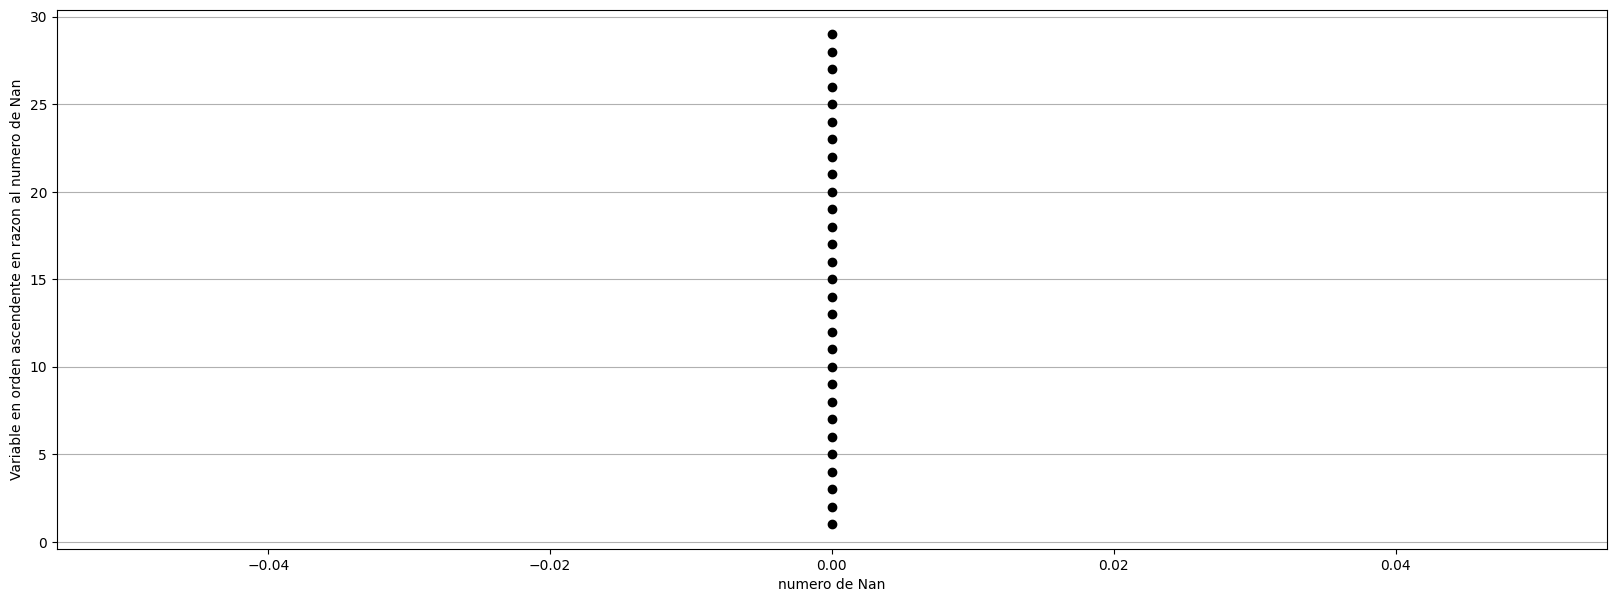

In [ ]:
graf_num_nan(dfp)

## renombramiento de columnas

In [29]:
cols = {'area':'area m2','trans. publico cercano': 'trasn. publico',
        'cocina integral' : 'cocina', 'bano auxiliar':'bano aux',
        'zona de lavanderia' : 'zona lavanderia' , 'supermercados / c.comerciales': 'supermercado o cc',
        'nombre municipio': 'municipio', 'nombre departamento':'departamento',
        'tipo: municipio / isla / area no municipalizada':'tipo vivienda'}
dfp = dfp.rename(columns=cols)

In [30]:
dfp.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area m2', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'balcon', 'trasn. publico', 'estrato',
       'antiguedad', 'cocina', 'bano aux', 'zona lavanderia', 'zonas verdes',
       'supermercado o cc', 'instalacion de gas', 'parqueadero visitantes',
       'colegios / universidades', 'parques cercanos', 'zona residencial',
       'closet', 'municipio', 'codigo departamento', 'codigo municipio',
       'departamento', 'tipo vivienda'],
      dtype='object')

In [38]:
dfcleancol = dfp.to_csv('dfclean', index=False)